In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

import cv2

from sklearn.experimental import enable_halving_search_cv

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import (train_test_split,cross_val_predict,cross_val_score
                                     ,RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV,HalvingRandomSearchCV)
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import (f1_score,precision_recall_curve,precision_score
                             ,recall_score,ConfusionMatrixDisplay,accuracy_score)

from plyer import notification
import json
import os 
from discord import SyncWebhook


import imgaug.augmenters as imaug


In [116]:
def alert():
    notification.notify(
    title = "Python",
    message = "Execution Completed",
    timeout = 10
    )
    

In [117]:
test_dir = "dataset/test/"
train_dir = "dataset/train/"

classes = os.listdir(train_dir)
classes

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

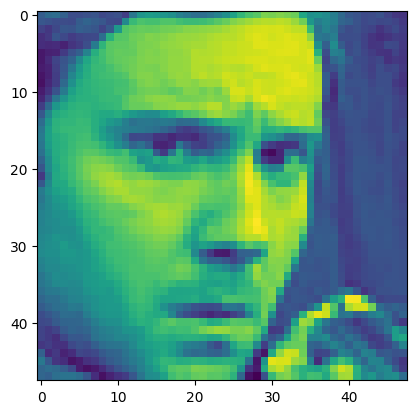

In [118]:
data = np.asarray(Image.open(r"dataset\train\angry\im0.png"))
# plt.imshow(data)
data = data.reshape(48*48)
plt.imshow(data.reshape(48,48))

In [119]:
x_train = []
y_train = []

In [120]:
def augument(data):
    final_img = []
    
    final_img.append(data)
    
    augmentation = imaug.Sequential([
        imaug.Affine(translate_percent={"x": (0.45, -0.45), "y": (-0.2, 0.2)},scale=(0.8,0.8)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])

    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
        imaug.Fliplr(1)
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
        imaug.Fliplr(1),
        imaug.Flipud(1)
        
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
        imaug.Fliplr(0),
        imaug.Flipud(1)
        
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8)),
        
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8)),
        imaug.Flipud(1),
        imaug.Fliplr(1),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
        
    
    return final_img

In [121]:
encoded_classes = [i for i in range(len(classes))]
count = 0

for i in range(len(classes)):
    datalist = os.listdir(train_dir+classes[i])
    for j in datalist:
        data = np.asarray(Image.open(train_dir+classes[i]+"/"+j))
        aug_data = augument(data)
        for k in aug_data:
            data_norm = cv2.normalize(k.flatten(),None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
            x_train.append(data_norm.flatten())
            y_train.append(encoded_classes[i])
            count += 1
    print({classes[i]: count})
    count = 0

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)


{'angry': 31960}
{'disgusted': 3488}
{'fearful': 32776}
{'happy': 57720}


KeyboardInterrupt: 

In [ ]:
alert()

In [ ]:
def image_show(img):
    data = img.reshape(48,48)
    plt.imshow(cv2.cvtColor(data,cv2.COLOR_BGR2RGB))
    plt.show()

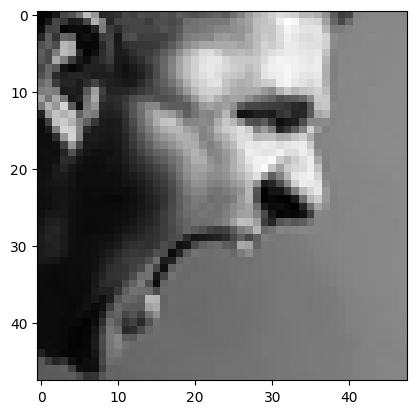

1324


In [ ]:
image_show(x_train[10])
print(x_train[0].argmax())

In [ ]:
x_train.shape

(28709, 2304)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


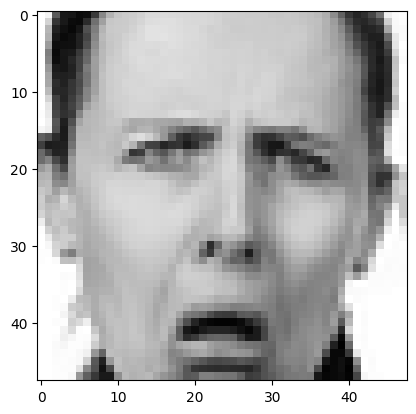

In [ ]:
print(y_train[4000])
image_show(x_train[4000])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25838, 2304)
(25838,)
(2871, 2304)
(2871,)


In [ ]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)

In [ ]:
x_train_scaled[0]


array([0.35738802, 0.35207668, 0.21761774, ..., 1.7070879 , 1.6840557 ,
       1.6622952 ], dtype=float32)

In [ ]:
# ord_encdr = OrdinalEncoder()
# y_train_encoded = ord_encdr.fit_transform(y_train.reshape(-1,1))

In [ ]:
# ord_encdr.categories_

In [ ]:
rnd_model = RandomForestClassifier(max_depth= 15,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 500,
 verbose=3,
 n_jobs=4)



In [ ]:
# hyperF = { 'max_depth': [3, 5, 6, 10, 15, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': np.arange(0.5, 1.0, 0.1),
#            'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'n_estimators': [100, 500, 1000],
#            'seed' : [20]}



# gridF = HalvingRandomSearchCV(rnd_model, hyperF,factor=2,random_state=42, cv = 3, verbose = 3, 
#                       n_jobs = -1)
# bestF = gridF.fit(x_train_scaled, y_train)

In [ ]:
# with open("parameter.json","w") as f:
#     json.dump(gridF.best_params_,f)
    


# webhook = SyncWebhook.from_url("https://discord.com/api/webhooks/1063122746835472466/QWFwQkRFXRtRLa0j21nvMl2D7qQooBs3OiAun2SEwlwSFf0UegILx4SXKxKQ_Gq7FjEr")
# webhook.send(f"```{gridF.best_params_}```")
    
# # os.system("shutdown /s /t 1")

In [ ]:
# gridF.best_params_

In [ ]:
pred_score = cross_val_score(rnd_model,x_train_scaled,y_train,cv=3)
print(pred_score)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    9.6s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   35.6s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  2.3min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   31.9s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  2.2min finished
[Parallel(n

[0.43097643 0.44490886 0.43300046]


[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.5s finished


In [ ]:
webhook = SyncWebhook.from_url("https://discord.com/api/webhooks/1063122746835472466/QWFwQkRFXRtRLa0j21nvMl2D7qQooBs3OiAun2SEwlwSFf0UegILx4SXKxKQ_Gq7FjEr")
webhook.send(f"Execution Complete - Score - {pred_score}")

In [ ]:
# pred = cross_val_predict(rnd_model,x_train_scaled,y_train,cv=3)
# print(pred[:3])

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    8.9s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   31.9s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  2.1min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    6.1s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   29.4s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  2.0min finished
[Parallel(n

[3 3 3]


[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.5s finished


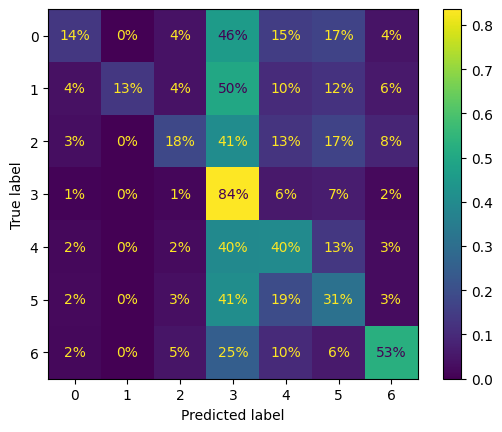

       0          1        2      3        4    5          6
0  angry  disgusted  fearful  happy  neutral  sad  surprised


In [ ]:
# ConfusionMatrixDisplay.from_predictions(y_train,pred,values_format='.0%',normalize='true')
# plt.show()
# print(pd.DataFrame([classes]))

In [ ]:
count = 0

In [ ]:
# for i in range(len(classes)):
#     datalist = os.listdir(train_dir+classes[i])
#     for j in datalist:
#         count += 1
#     print({classes[i]: count})
#     count = 0
        

{'angry': 3995}
{'disgusted': 436}
{'fearful': 4097}
{'happy': 7215}
{'neutral': 4965}
{'sad': 4830}
{'surprised': 3171}


In [ ]:
# augmentation = imaug.Sequential([
#     # 1. Flip
#     imaug.Fliplr(1),
#     imaug.Flipud(1),
#     # 2. Affine
#     imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
#     # 3. Multiply
#     imaug.RemoveSaturation(1),
#     imaug.Multiply((1,1)),
#     # 4. Linearcontrast
#     imaug.LinearContrast((0.6, 1.4)),
#     # Perform methods below only sometimes
#     imaug.Sometimes(0.5,
#         # 5. GaussianBlur
#         imaug.GaussianBlur((0.0, 3.0))
#         )
# ])

368


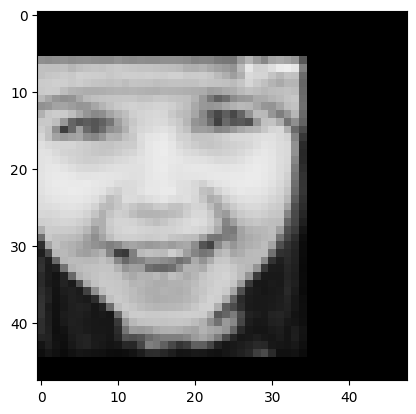

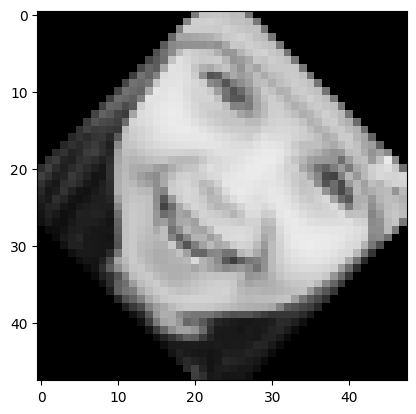

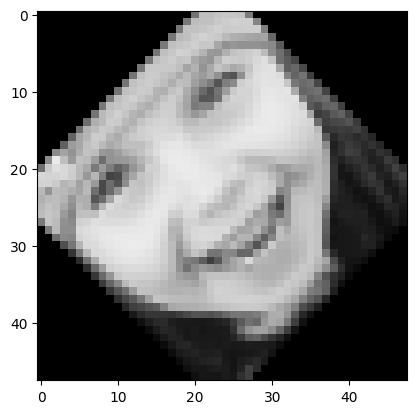

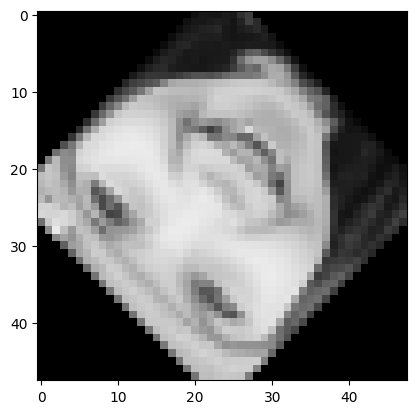

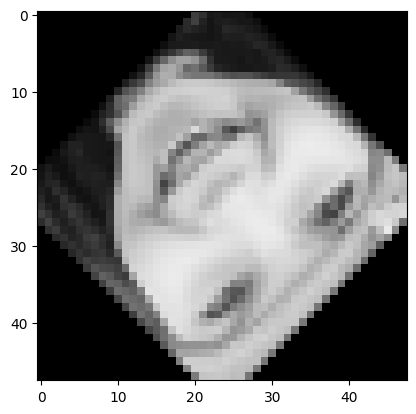

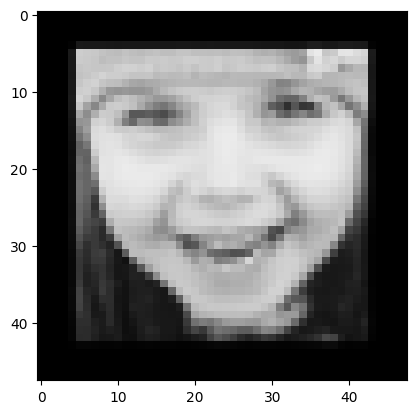

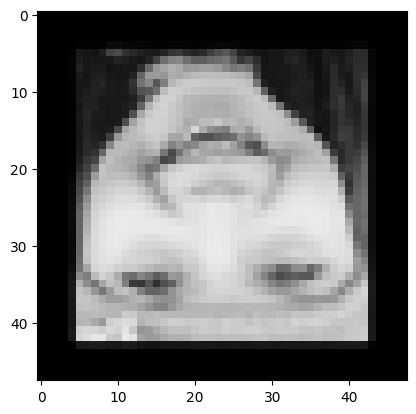

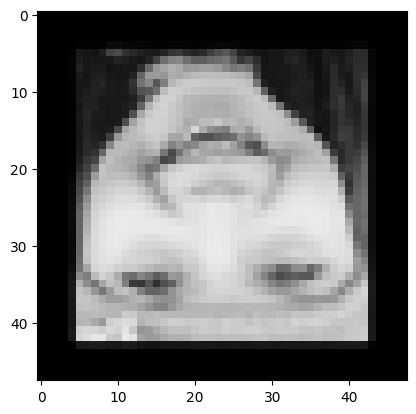

In [ ]:
# temp_img = np.asarray(Image.open(r"dataset\test\happy\im1710.png"))

# a = augument(temp_img)

# for i in a:
#     image_show(i)